In [1]:
using LinearAlgebra
using SparseArrays
using BenchmarkTools
using Random
using Distributions
using Plots

In [104]:
ct1 = 0
ct2 = 0
for _ in 1:10000
    foo = rand(Uniform(-10,10), 4, 4)
    l1, _ = eigen(foo)
    l1 = real.(l1)
    l1_min = minimum(l1)
    l1_max = maximum(l1)

    bar = (foo + foo')/2
    l2, _ = eigen(bar)
    l2_min = minimum(l2)
    l2_max = maximum(l2)

    ct1 += Int(l1_min < l2_min)
    ct2 += Int(l2_max < l1_max)
end
println("ct1 = ", ct1)
println("ct2 = ", ct2)

ct1 = 0
ct2 = 0


In [105]:
foo = rand(Uniform(-10,10), 4, 4)
bar = (foo + foo')/2
pac = (foo - foo')/2

γ = 0.1
λp, v = eigen(bar)
# N_neg = count(i->(real(i) < 0.0), λp)
λp[real.(λp) .< 0] .= γ  # .+ (rand(N_neg) .* γ/10)
# N_img = count(i->(imag(i) != 0.0), λp)
# λp[imag.(λp) .!= 0.0] .= real.(λp[imag.(λp) .!= 0.0]) #+ rand(N_img) 
zap = v * Diagonal(λp) * (v\1.0I)

4×4 Matrix{Float64}:
  0.210726   -0.0982325  0.113304    0.111711
 -0.0982325   7.25141    0.0570213  -3.6207
  0.113304    0.0570213  0.219455    0.0357768
  0.111711   -3.6207     0.0357768   1.96825

In [14]:
a = [1 -1 0 -2]
b = any(a .< -3) + any(a .> 1) + any(a .> 0.1)

1

In [12]:
10^floor(log10(0.055)) / 2

0.005000000000000001

In [3]:
x = range(0,1,2^7)

0.0:0.007874015748031496:1.0

In [4]:
train_wave = (a,b,c) -> a .* sin.(2*π*ceil(b) .* x .+ c)

#11 (generic function with 1 method)

In [14]:
norm(train_wave(0.6,7,3))

4.781962917924284

In [5]:
if (@isdefined a) && (@isdefined b) && (@isdefined c)
    println("a and b are defined")
end

In [15]:
train_wave = (a,b,c) -> exp.(-a * cos.(π .* x .+ b).^2) .- c

#13 (generic function with 1 method)

In [45]:
train_wave3 = (a,b,c) -> exp.(-a * cos.(π .* x).^2 .+ b .* sin.(4*π .* x .+ π/3).^2 .- c .* cos.(3*π .* x).^2) 

#19 (generic function with 1 method)

In [74]:
norm(train_wave3(1,0.5,1))

7.1809556661202025

In [106]:
eigen(zap)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
4-element Vector{Float64}:
 0.09999999999999949
 0.09999999999999963
 0.35584024650442625
 9.093994817808978
vectors:
4×4 Matrix{Float64}:
  0.758565   0.0937271  -0.651413  -0.0155071
 -0.11616    0.391881   -0.156486   0.891311
 -0.586409  -0.504641   -0.682957   0.00370225
 -0.259249   0.763532   -0.291107  -0.453113

In [107]:
eigen(bar)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
4-element Vector{Float64}:
 -15.291019624856911
  -7.09950814662783
   0.35584024650442636
   9.093994817808985
vectors:
4×4 Matrix{Float64}:
  0.703379   0.28404   0.651413   0.0155071
 -0.260996   0.336093  0.156486  -0.891311
 -0.380669  -0.623416  0.682957  -0.00370225
 -0.540583   0.646309  0.291107   0.453113

In [10]:
s

4-element Vector{ComplexF64}:
               0.1 + 0.0im
               0.1 + 0.0im
 12.33193892302421 - 3.479711733044939im
 12.33193892302421 + 3.479711733044939im

In [15]:
v * diagm(s) * v^(-1)

4×4 Matrix{ComplexF64}:
  7.39597+4.0359e-16im   6.96738+2.62968e-15im  …   5.47594-7.06443e-16im
 -1.13444+2.30578e-16im  3.05888-1.18363e-15im     -3.99011+1.22111e-15im
  2.31802+4.66593e-16im  6.21741+3.06297e-16im     -1.36905+9.12678e-16im
  6.30664+1.25411e-16im  4.80703+2.06405e-15im      5.77726-8.21851e-16im

In [10]:
M = [0 0 0 -9;
    1 0 0 0;
    0 1 0 10;
    0 0 1 0]
s, v = eigen(M)

N = [0 0 0; 1 0 5; 0 1 0]
s, v = eigen(N)

f = (x) -> x.^4 -10 .* x.^2 .+ 9
for si in s
    val = f(si)
    println("f($si) = $val")
end

f(-2.23606797749979) = -16.000000000000004
f(0.0) = 9.0
f(2.23606797749979) = -16.000000000000004


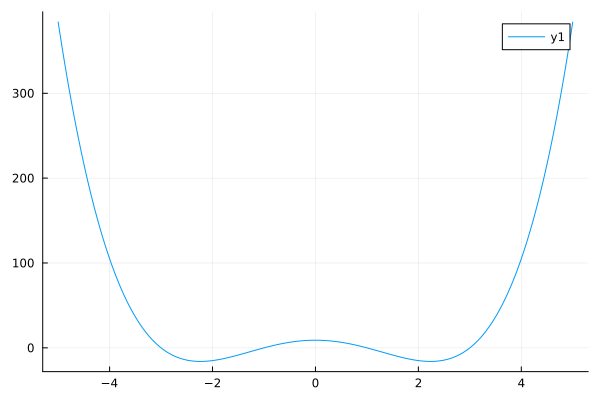

In [13]:
plot(-5:0.01:5, f(-5:0.01:5))

In [22]:
using JuMP
using Ipopt
using Pipe

i = 2
model = Model(Ipopt.Optimizer; add_bridges=false)
@variable(model, x[1:5])

@pipe x |> [JuMP.delete(model, x), JuMP.unregister(model, :x)]
@show JuMP.is_valid(model, x)

MethodError: MethodError: objects of type Vector{Nothing} are not callable
Use square brackets [] for indexing an Array.

In [2]:
struct elemat{T} <: AbstractVector{T}
    n::Int
    i::Int

    function elemat(n::Int, i::Int)
        @boundscheck n >= i || throw(ArgumentError("$i is larger than the size $n"))
        e = spzeros(n,1)
        e[i] = 1
        return e
    end
end

"""
    elemat(n,i,j)
"""

struct Elemat{T} <: AbstractMatrix{T}
    m :: Int
    n :: Int
    i :: Int
    j :: Int
    
    function Elemat(m::Integer, n::Integer, i::Integer, j::Integer)
        return elemat(m,i) * elemat(n,j)'
    end
end

Elemat(m::Integer, i::Integer, j::Integer) = Elemat(m, m, i, j)

Elemat

In [3]:
# Kronecker delta
function delta(i::Int, j::Int)
    return Int(i == j)
end

"""
    commat(n,i,j)
"""

struct commat{T} <: AbstractMatrix{T}
    m::Int
    n::Int

    function commat(m::Integer, n::Integer)
        v = [m * (j-1) + i for i in 1:m, j in 1:n]'[:]
        # apply this permutation to the rows (i.e. to each column) of identity matrix
        K = [[delta(i, j) for j in 1:(m*n)] for i in 1:(m*n)]
        tmp = [K[i] for i in v]
        return sparse(reduce(vcat, tmp'))
    end
end

commat(m::Integer) = commat(m, m)


"""
    nommat(n,i,j)
"""

struct nommat{T} <: AbstractMatrix{T}
    m::Int
    n::Int

    function nommat(m::Integer, n::Integer)
        mn = Int(m * n)
        return 0.5 * (sparse(1.0I, mn, mn) + commat(m, n))
    end
end

nommat(m::Integer) = nommat(m, m)

nommat

In [4]:
function vech(A::AbstractMatrix{T}) where {T}
    m = LinearAlgebra.checksquare(A)
    v = Vector{T}(undef, Int(m * (m + 1) /2))
    k = 0
    for j = 1:m, i = j:m
        @inbounds v[k+=1] = A[i, j]
    end
    return v
end

vech (generic function with 1 method)

In [5]:
struct unit_DL{T} <: AbstractVector{T}
    n::Int
    i::Int
    j::Int

    function unit_DL(n::Integer, i::Integer, j::Integer)
        @boundscheck i >= j || throw(ArgumentError("Does not satisfy i >= j"))
        u = spzeros(Int(0.5 * n * (n+1)), 1)
        u[Int( (j-1)*n + i - 0.5*j*(j-1) )] = 1.0
        return u
    end
end

In [6]:
struct elimat{T} <: AbstractMatrix{T}
    m::Int
    
    function elimat(m::Integer)
        T = tril(ones(m, m)) # Lower triangle of 1's
        f = findall(x -> x == 1, T[:]) # Get linear indexes of 1's
        k = m * (m + 1) / 2 # Row size of L
        m2 = m * m # Colunm size of L
        x = f + m2 * (0:k-1) # Linear indexes of the 1's within L'

        row = [mod(a, m2) != 0 ? mod(a, m2) : m2 for a in x]
        col = [mod(a, m2) != 0 ? div(a, m2) + 1 : div(a, m2) for a in x]
        L = sparse(row, col, ones(length(x)), m2, k)
        L = L' # Now transpose to actual L
        return L
    end
end

In [11]:
N = 3
Δx = 0.5
S = Int(N * (N + 1) / 2)
Fval = repeat([1.0, 1.0, -1.0, -1.0], outer=N - 2)

4-element Vector{Float64}:
  1.0
  1.0
 -1.0
 -1.0

In [12]:
row_i = repeat(2:(N-1), inner=4)

4-element Vector{Int64}:
 2
 2
 2
 2

In [14]:
N = 4
seq = Int.([2 + (N + 1) * (x - 1) - x * (x - 1) / 2 for x in 1:(N-1)])

3-element Vector{Int64}:
 2
 6
 9

In [ ]:
col_i = vcat(seq[1], repeat(seq[2:end-1], inner=2), seq[end])

In [ ]:
F = sparse(row_i, col_i, Fval, N, S) / 2 / Δx

In [54]:
N = 4
S = N*(N+1)/2
dx = 1/6

ii = repeat(2:(N-1), inner=4)
m = 2:N-1
mi = Int.([N*(N+1)/2 - (N-m)*(N-m+1)/2 - (N-m) for m in 2:N-1])               # this is where the xi^2 term is
mm = Int.([N*(N+1)/2 - (N-m).*(N-m+1)/2 - (N-m) - (N-(m-2)) for m in 2:N-1])  # this is where the x_{i-1}^2 term is
mp = Int.([N*(N+1)/2 - (N-m).*(N-m+1)/2 - (N-m) + (N-(m-1)) for m in 2:N-1])  # this is where the x_{i+1}^2 term is
jp = mi .+ 1  # this is the index of the x_{i+1}*x_i term
jm = mm .+ 1  # this is the index of the x_{i-1}*x_i term
jj = reshape([mp'; mm'; jp'; jm'],4*N-8);
vv = reshape([-ones(1,N-2); ones(1,N-2); -ones(1,N-2); ones(1,N-2)],4*N-8)/(6*dx);
F = sparse(ii,jj,vv,N,N*(N+1)/2)
# Boundary conditions
F[1,2] = -1/6/dx
F[1,N+1] = -1/6/dx
F[N,end-1] = 1/6/dx
F[N,end-2] = 1/6/dx
F

4×10 SparseMatrixCSC{Float64, Int64} with 12 stored entries:
  ⋅   -1.0   ⋅    ⋅   -1.0    ⋅    ⋅     ⋅     ⋅     ⋅ 
 1.0   1.0   ⋅    ⋅     ⋅   -1.0   ⋅   -1.0    ⋅     ⋅ 
  ⋅     ⋅    ⋅    ⋅    1.0   1.0   ⋅     ⋅   -1.0  -1.0
  ⋅     ⋅    ⋅    ⋅     ⋅     ⋅    ⋅    1.0   1.0    ⋅ 

In [64]:
a = range(0.8,1.2,10)

0.8:0.044444444444444446:1.2

In [67]:
zeros(1,1) .* rand(5,5)

5×5 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0

In [78]:
a  = zeros(1,1)
a[1] == 0
a = size(a)==(1,1) && a[1]==0 ? 0 : 1

0

In [86]:
typeof(NaN) == Float64

true

In [3]:
a = 1 
b = 2
c = 3 
n = 10
@info """

Constraint         = Non-Constrained
order              = $(n)
termination_status = $(a)
primal_status      = $(b)
objective_value    = $(c)
"""

┌ Info: 
│ Constraint        = Non-Constrained
│ order              = 10
│ termination_status = 1
│ primal_status      = 2
│ objective_value    = 3
└ @ Main c:\Users\tkoike3\Code\LiftAndLearn.jl\examples\scribble.ipynb:5


In [21]:
function generateEPmatrix(N, Δx, μ::Float64)
    # Create A matrix
    A = diagm(0 => (-2) * ones(N), 1 => ones(N - 1), -1 => ones(N - 1)) * μ / Δx^2
    A[1, N] = μ / Δx^2
    A[N, 1] = μ / Δx^2

    # Create F matrix
    S = Int(N * (N + 1) / 2)
    if N >= 3
        ii = repeat(2:(N-1), inner=4)
        m = 2:N-1
        mi = Int.([N*(N+1)/2 - (N-m)*(N-m+1)/2 - (N-m) for m in 2:N-1])               # this is where the xi^2 term is
        mm = Int.([N*(N+1)/2 - (N-m).*(N-m+1)/2 - (N-m) - (N-(m-2)) for m in 2:N-1])  # this is where the x_{i-1}^2 term is
        mp = Int.([N*(N+1)/2 - (N-m).*(N-m+1)/2 - (N-m) + (N-(m-1)) for m in 2:N-1])  # this is where the x_{i+1}^2 term is
        jp = mi .+ 1  # this is the index of the x_{i+1}*x_i term
        jm = mm .+ 1  # this is the index of the x_{i-1}*x_i term
        jj = reshape([mp'; mm'; jp'; jm'],4*N-8);
        vv = reshape([-ones(1,N-2); ones(1,N-2); -ones(1,N-2); ones(1,N-2)],4*N-8)/(6*Δx);
        F = sparse(ii,jj,vv,N,S)

        # Boundary conditions
        F[1,2] = -1/6/Δx
        F[1,N+1] = -1/6/Δx
        F[1,N] = 1/6/Δx
        F[1,end] = 1/6/Δx
        F[N,end-1] = 1/6/Δx
        F[N,end-2] = 1/6/Δx
        F[N,1] = -1/6/Δx
        F[N,N] = -1/6/Δx
    else
        F = zeros(N, S)
    end

    return A, F
end

generateEPmatrix (generic function with 1 method)

In [24]:
A, F = generateEPmatrix(4, 1/6, 1.0)

([-72.0 36.0 0.0 36.0; 36.0 -72.0 36.0 0.0; 0.0 36.0 -72.0 36.0; 36.0 0.0 36.0 -72.0], sparse([2, 4, 1, 2, 1, 4, 1, 3, 2, 3, 2, 4, 3, 4, 1, 3], [1, 1, 2, 2, 4, 4, 5, 5, 6, 6, 8, 8, 9, 9, 10, 10], [1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0], 4, 10))

In [25]:
F

4×10 SparseMatrixCSC{Float64, Int64} with 16 stored entries:
   ⋅   -1.0   ⋅    1.0  -1.0    ⋅    ⋅     ⋅     ⋅    1.0
  1.0   1.0   ⋅     ⋅     ⋅   -1.0   ⋅   -1.0    ⋅     ⋅ 
   ⋅     ⋅    ⋅     ⋅    1.0   1.0   ⋅     ⋅   -1.0  -1.0
 -1.0    ⋅    ⋅   -1.0    ⋅     ⋅    ⋅    1.0   1.0    ⋅ 

In [3]:
A = rand(5,5)

5×5 Matrix{Float64}:
 0.417938  0.806233   0.699986   0.255434  0.83579
 0.336038  0.0927685  0.677172   0.562938  0.647408
 0.546276  0.873308   0.0371454  0.228456  0.0627147
 0.355165  0.495973   0.70881    0.164552  0.260624
 0.720333  0.897354   0.642968   0.771093  0.434109

In [7]:
a = 2
A + a.*I

5×5 Matrix{Float64}:
 2.41794   0.806233  0.699986  0.255434  0.83579
 0.336038  2.09277   0.677172  0.562938  0.647408
 0.546276  0.873308  2.03715   0.228456  0.0627147
 0.355165  0.495973  0.70881   2.16455   0.260624
 0.720333  0.897354  0.642968  0.771093  2.43411

In [74]:
pd = 1
qd = 2
rd = 3
A = 3
C = 1
Id = 1
po = 2
qo = qd/pd * po
ro = 2*Id*rd*po/(Id*pd+(A-C)*po)


X12 = ((A-C)*ro - 2*Id*rd) / A
X13 = ((A-C)*qo + Id*qd) / A
X21 = (2*Id*rd - (A-C)*ro) / A
X23 = (-(A-C)*po + Id*pd) / A
X31 = -Id*qd / C
X32 = Id*pd / C


X = [0 X12 X13;
    X21 0 X23;
    X31 X32 0]

3×3 Matrix{Float64}:
  0.0  -0.4   3.33333
  0.4   0.0  -1.0
 -2.0   1.0   0.0

In [75]:
eigen(X)

Eigen{ComplexF64, ComplexF64, Matrix{ComplexF64}, Vector{ComplexF64}}
values:
3-element Vector{ComplexF64}:
 -0.03405137184316559 - 2.7982396527888516im
 -0.03405137184316559 + 2.7982396527888516im
   0.0681027436863315 + 0.0im
vectors:
3×3 Matrix{ComplexF64}:
   0.748027-0.0im         0.748027+0.0im       0.441047+0.0im
  -0.220832+0.116442im   -0.220832-0.116442im  0.889981+0.0im
 -0.0341412-0.613975im  -0.0341412+0.613975im  0.115809+0.0im

## Positive Definite matrix

In [1]:
using LinearAlgebra
using JuMP
using Random
using SCS
using BenchmarkTools

In [4]:
function model(A, n)
    model1 = Model(SCS.Optimizer)
    set_silent(model1)
    @variable(model1, D[1:n, 1:n], PSD)
    @expression(model1, d, diag(D))
    @objective(model1, Min, sum(d))
    @constraint(model1, (A + D) in PSDCone())
    JuMP.optimize!(model1)
    Dopt = value.(D)
    return Dopt
end

N = 10
λ_all = Vector{Vector{Float64}}(undef, N)
λpsd_all = Vector{Vector{Float64}}(undef, N)
λpd_all = Vector{Vector{Float64}}(undef, N)
Dopt_all = Vector{Matrix{Float64}}(undef, N)
Apd_all = Vector{Matrix{Float64}}(undef, N)

for n in 1:N

    A = rand(n,n)
    A = (A + A')/2

    # Dopt = model(A, n)
    not_pd = true
    γ_lb = 1e-8
    while not_pd
        model1 = Model(SCS.Optimizer)
        set_silent(model1)
        @variable(model1, D[1:n, 1:n], PSD)
        @variable(model1, γ_lb <= γ <= 0.1)
        @expression(model1, d, diag(D))
        @objective(model1, Min, sum(d) + γ)
        @constraint(model1, (A + D) in PSDCone())
        @constraint(model1, (A + D .+ γ*I) .>= γ_lb/10)
        JuMP.optimize!(model1)
        Dopt = value.(D)
        γopt = value(γ)

        Apd = A + Dopt + γopt * I
        not_pd = !isposdef(Apd)
        γ_lb *= 10
        if γ_lb > 1
            break
        end
        if !not_pd
            println("n = ", n)
            println("γ_lb = ", γ_lb)
            Apd_all[n] = Apd
            Dopt_all[n] = Dopt
            λpd, _ = eigen(Apd)
            λpd_all[n] = λpd
        end
    end

    # JuMP.unregister(model1, :D)
    # JuMP.unregister(model1, :d)
    # JuMP.unregister(model1, :γ)

end

n = 1
γ_lb = 1.0e-7
n = 2
γ_lb = 1.0e-7
n = 3
γ_lb = 0.001
n = 4
γ_lb = 1.0e-7
n = 5
γ_lb = 0.001
n = 6
γ_lb = 9.999999999999999e-5


n = 7
γ_lb = 1.0e-7


n = 8
γ_lb = 9.999999999999999e-5


n = 9
γ_lb = 9.999999999999999e-5


n = 10
γ_lb = 9.999999999999999e-6


In [59]:
γopt

9.98139725321573e-5

In [60]:
Dopt_all[10]

10×10 Matrix{Float64}:
  0.109782    0.0369402  -0.0899058  …  -0.0130133  -0.019333   -0.0109649
  0.0369402   0.30425    -0.242847       0.0952652   0.152305    0.0730081
 -0.0899058  -0.242847    0.241223      -0.0496197  -0.0844962  -0.104144
  0.0565693  -0.156551    0.0961764      0.0467147  -0.201088   -0.174342
  0.0614738   0.156457   -0.107812       0.118548    0.0682734  -0.179571
 -0.118998   -0.0452032   0.0837047  …   0.225019   -0.26491    -0.0422486
 -0.0199376  -0.326182    0.225377      -0.324206    0.0229013   0.136166
 -0.0130133   0.0952652  -0.0496197      0.276421   -0.189697   -0.159147
 -0.019333    0.152305   -0.0844962     -0.189697    0.406185    0.124124
 -0.0109649   0.0730081  -0.104144      -0.159147    0.124124    0.354157

In [5]:
for n in 1:N
    println("n = $n")
    println("λpd = ", λpd_all[n])
end

n = 1


λpd = 

[0.4734009490807311]
n = 2
λpd = [0.1849819833372284, 0.8820680560833327]
n = 3
λpd = [6.468577374406588e-5, 0.05566982780519548, 1.6117583650113532]
n = 4
λpd = [4.661279514244788e-5, 4.920875335063208e-5, 0.27870774945815124, 2.0049585300588713]
n = 5
λpd = [8.466359665425808e-5, 9.947412203149814e-5, 0.29784402185480136, 0.4639974525485556, 2.4125151784209677]
n = 6
λpd = [3.706122762959494e-6, 4.215574237891904e-6, 3.4193134752292945e-5, 0.737339150089506, 0.944097413701972, 2.8864282835122443]
n = 7
λpd = [9.811585948430339e-9, 9.863204921078684e-9, 9.883203783152058e-9, 1.0190787550512542e-8, 0.2023844666022052, 0.5126137609699556, 3.642776704069516]
n = 8
λpd = [0.0001353556312818269, 0.00013543256623279603, 0.00013547547725489587, 0.00013581635415185972, 0.4583539083708855, 0.6124596329307473, 0.7647150868774771, 4.071633237787463]
n = 9
λpd = [4.3061835188726397e-7, 1.1744208572273822e-5, 1.759295132737878e-5, 2.3475304593142915e-5, 0.0557134707476078, 0.36737622094088573, 0.5

In [1]:
a = 1
b = 2
@assert a==b "a is not equal to b"

AssertionError: AssertionError: a is not equal to b

## FFT Scribbles

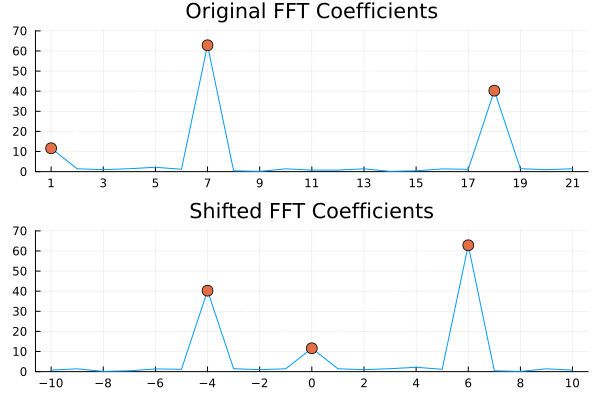

In [1]:
using FFTW
using Plots

N = 21
xj = (0:N-1)*2*π/N
f = 2*exp.(17*im*xj) + 3*exp.(6*im*xj) + rand(N)

original_k = 1:N
shifted_k = fftshift(fftfreq(N)*N)

original_fft = fft(f)
shifted_fft = fftshift(fft(f))

p1 = plot(original_k,abs.(original_fft),title="Original FFT Coefficients", xticks=original_k[1:2:end], legend=false, ylims=(0,70));
p1 = plot!([1,7,18],abs.(original_fft[[1,7,18]]),markershape=:circle,markersize=6,linecolor="white");
p2 = plot(shifted_k,abs.(shifted_fft),title="Shifted FFT Coefficients",xticks=shifted_k[1:2:end], legend=false, ylims=(0,70));
p2 = plot!([-4,0,6],abs.(shifted_fft[[7,11,17]]),markershape=:circle,markersize=6,linecolor="white");
plot(p1,p2,layout=(2,1))

In [72]:
using FFTW
using Test

N = 22
xj = (0:N-1)*2*π/N
f = 2*sin.(6*xj) + 0.1*rand(N)
z = zeros(ComplexF64, 12)

p = plan_rfft(f)
ip = plan_irfft(z,N)

Y = p * f
f2 = ip * Y

@test f ≈ f2
# Test Passed

Test Passed

In [3]:
i = 1
foo = zeros(1,10)
for k in rand(10,1)
    foo[i+=1] = k
end
foo

BoundsError: BoundsError: attempt to access 1×10 Matrix{Float64} at index [11]

In [3]:
using LinearAlgebra, FFTW

a = Matrix{ComplexF64}(undef, 10, 2)


10×2 Matrix{ComplexF64}:
 9.49137e-312+9.49133e-312im  9.49138e-312+9.49133e-312im
 9.49133e-312+9.49123e-312im  9.49133e-312+5.0e-324im
 9.49137e-312+9.49137e-312im  9.49137e-312+9.49137e-312im
 9.49137e-312+9.49133e-312im  9.49137e-312+9.49133e-312im
 9.49133e-312+9.49133e-312im  9.49133e-312+9.49133e-312im
 9.49137e-312+9.49135e-312im  9.49137e-312+9.49137e-312im
 9.49135e-312+9.49135e-312im  9.49137e-312+9.49133e-312im
 9.49123e-312+9.49133e-312im  9.49133e-312+9.49133e-312im
 9.49133e-312+9.49135e-312im  9.49133e-312+7.4e-323im
 9.49133e-312+9.49133e-312im      7.4e-323+4.0e-323im